# KANSVERDELINGEN - LESNOTEBOOK

# OPZETTEN OMGEVING

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson

# 1. WAT IS EEN KANSVERDELING ?

### Experiment (simulatie) : gooi met 2 dobbelstenen

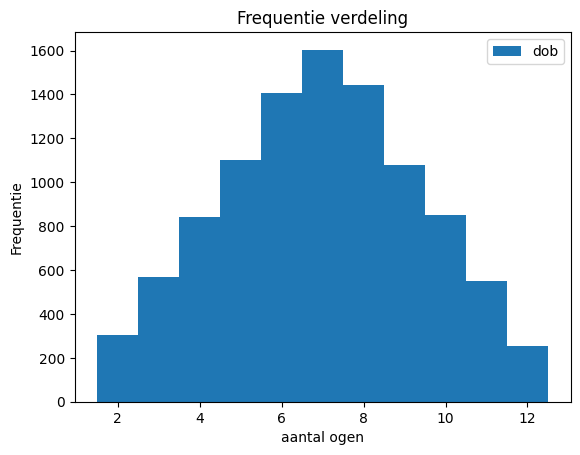

In [4]:
dob1 = np.random.randint(1,7,10000)
dob2 = np.random.randint(1,7,10000)
dob = pd.DataFrame({"dob": dob1 + dob2})
dob.plot.hist(title='Frequentie verdeling', bins = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])
plt.xlabel('aantal ogen')
plt.ylabel('Frequentie')
plt.show()

### Theoretische kansverdeling : gooi met 2 dobbelstenen

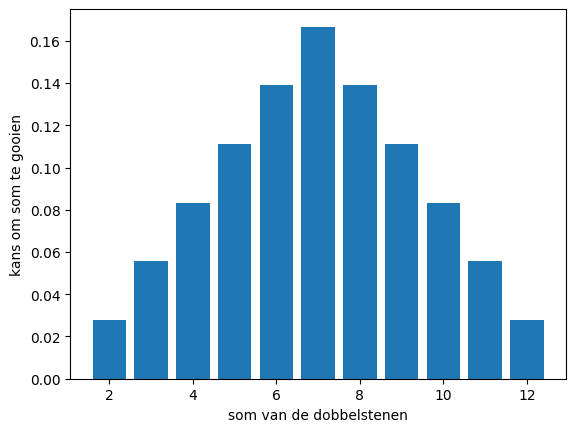

In [5]:
value = range(2,13)
probability = pd.Series([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])/36.0
plt.bar(value, probability)
plt.xlabel('som van de dobbelstenen')
plt.ylabel('kans om som te gooien')
plt.show()

# 2. VERBAND MET FREQUENTIETABEL

# 3. CENTRUM- EN SPREIDINGSMATEN VAN EEN KANSVERDELING

# 4. COMMON PROBABILITY DISTRIBUTIONS

## 4.1 Binomial distribution

#### Experiment (simulatie) : gooi 10 keer een muntstuk op en tel het aantal keren kop

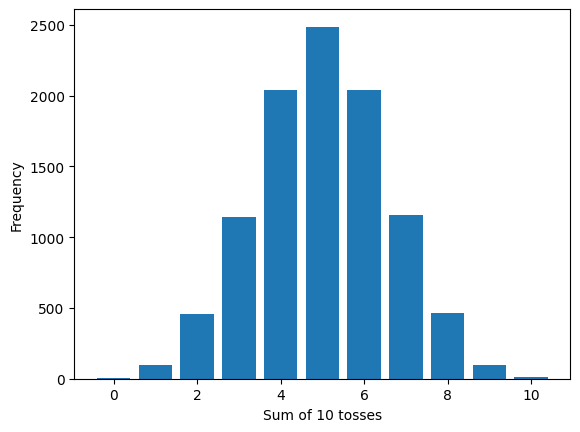

In [6]:
sample_size = 10000

gameresults = []
for i in range(0,sample_size):
  toss = sum(np.random.randint(0,2,10))
  gameresults.append(toss)
freq_distr = {}
for i in range(0,11):
    freq_distr[i]=0
for i in range(0,sample_size):
    freq_distr[gameresults[i]] = freq_distr[gameresults[i]] + 1
freq_distr = list(freq_distr.values())

x=range(0,11)
y=freq_distr
#y= (0,1,1,10,28,21,19,15,2,0,0)
plt.figure()
plt.bar(x, y)
plt.xlabel('Sum of 10 tosses')
plt.ylabel('Frequency')
plt.show()

#### Theoretische kansverdeling : gooi 10 keer een muntstuk op en tel het aantal keren kop

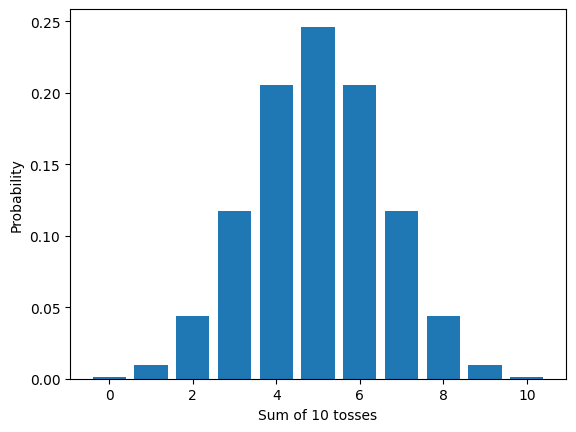

In [7]:
from scipy.stats import binom
p = []
for i in range(0,11):
    p.append(binom.pmf(i,10,0.5))

x=range(0,11)
y=p
#y= (0,1,1,10,28,21,19,15,2,0,0)
plt.figure()
plt.bar(x, y)
plt.xlabel('Sum of 10 tosses')
plt.ylabel('Probability')
plt.show()

#### Theoretische kansverdeling : examen met 5 meerkeuzevragen met 4 antwoordmogelijkheden

[0.23730469 0.39550781 0.26367187 0.08789062 0.01464844 0.00097656]
[0.23730469 0.6328125  0.89648438 0.984375   0.99902344 1.        ]


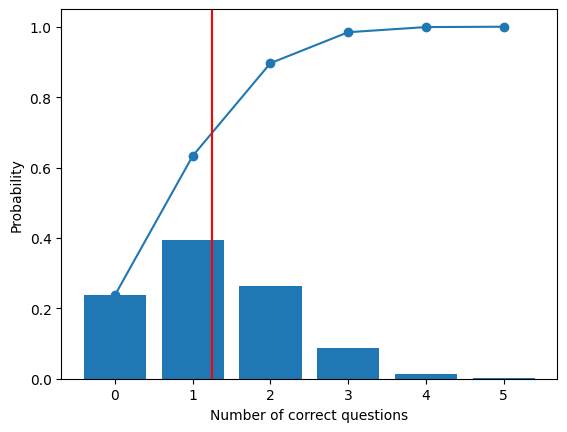

In [8]:
x = range(0,6)

# binom.pmf = Probability Mass Function: binom.pmf(x,n,p) = P(x) given n and p
# Probability for x positive results given n turns, and given a probability of p 
# for a positive result per turn
prob = binom.pmf(x,5,1/4)
# binom.cdf = Cumulative Density Function: binom.cdf(x,n,p) = P(<=x) given n and p
# Probability for 0, 1, ..., x positive results given n turns, and given a 
# probability of p for a positive result per turn
cumul = binom.cdf(x,5,1/4)

print(prob)
print(cumul)

# Plot distribution
plt.bar(x, prob)
plt.plot(x, cumul, marker='o')
plt.axvline(binom.mean(5,1/4), color='red')
plt.xlabel('Number of correct questions')
plt.ylabel('Probability')
plt.show()

#### Kans om te slagen voor dit examen

In [9]:
# Probability to get 3, 4 or 5 correct answers
binom.pmf(3,5,1/4) + binom.pmf(4,5,1/4) + binom.pmf(5,5,1/4)

0.10351562499999994

In [10]:
# Alternative : probabity to get 0, 1 or 2 correct answers
1-binom.cdf(2,5,1/4)

0.103515625

#### Verwachte waarde (hoeveel vragen zullen gemiddeld goed zijn)

In [11]:
# Expected value (population mean μ)
mu = binom.mean(5, 1/4)
print(mu)
# Alternative
mu = 5 * 1/4
print(mu)

1.25
1.25


In [12]:
# Alternative
mu = 5 * 1/4
print(mu)

1.25


#### Variantie en standaarddeviatie

In [13]:
# Standard deviation σ
sigma = binom.std(5,1/4)
print(sigma)

0.9682458365518543


In [14]:
# Alternative
sigma = math.sqrt(5 * 1/4 * (1-1/4))
print(sigma)

0.9682458365518543


#### Alle basisstatistieken

In [15]:
#binom.mean(5, 1/4)
#binom.median(5, 1/4)
#binom.var(5, 1/4)
#binom.std(5, 1/4)

print(binom.stats(5, 1/4, moments='mvsk')) 
# moments: Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

(1.25, 0.9375, 0.5163977794943222, -0.13333333333333333)


#### Oefening : examen met 20 multiple choice vragen met 4 antwoordmogelijkheden per vraag

Expected value (expected score when guessing) :  5.0
Variance :  1.9364916731037085


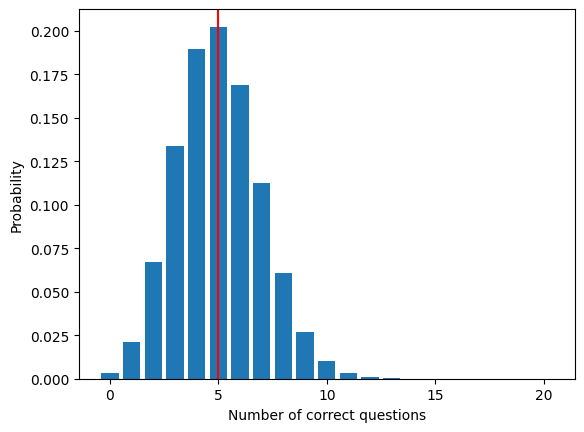

(5.0, 3.75, 0.2581988897471611)

In [16]:
n = 20
p = 1/4

# Expected score when guessing
mu = binom.mean(20,1/4)
print('Expected value (expected score when guessing) : ', mu)

# Standard deviation
sigma = binom.std(20,1/4)
print('Variance : ', sigma)

# Distribution
x = range(0, n+1)
plt.bar(x, binom.pmf(x, n, p))
#plt.plot(x,binom.cdf(x, n, p), marker='o')
plt.axvline(binom.mean(n,p), color='red')
plt.xlabel('Number of correct questions')
plt.ylabel('Probability')
plt.show()

binom.stats(20, 1/4, moments='mvs')

 ## 4.2 Normal distribution

In [17]:
from scipy.stats import norm

Probability to measure 180 cm:

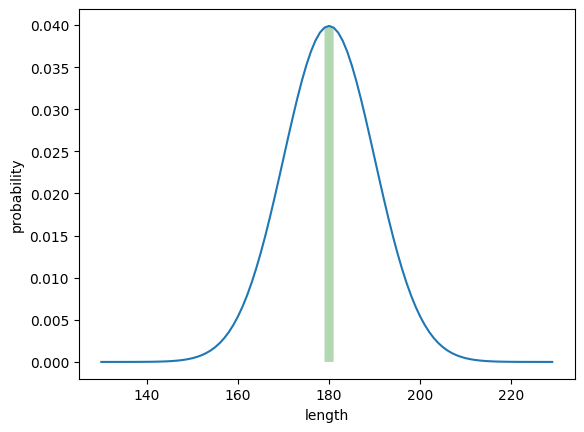

In [18]:
x = np.arange(130, 230.0, 1.0)
p = norm.pdf(x, loc=180, scale=10)
plt.plot(x, p)
#plt.fill_between(x,p, where = (x<=179.5), facecolor='red', alpha=.3)
#plt.fill_between(x,p, where = (x<=180.5), facecolor='green', alpha=.3)
plt.fill_between(x,p, where = (x>=179) & (x<=181), facecolor='green', alpha=.3)
plt.xlabel('length')
plt.ylabel('probability')
plt.show()

In [19]:
norm.pdf(180, loc=180, scale = 10) # probability density function

0.03989422804014327

Is identical to:

In [20]:
norm.cdf (180.5, loc=180, scale=10) - norm.cdf(179.5, loc=180, scale=10) # difference in cumulative density function

0.03987761167674497

What if we set the interval smaller?

In [21]:
norm.cdf (180.1, loc=180, scale=10) - norm.cdf(179.9, loc=180, scale=10)

0.007978712629262752

Probability to measure between 170 and 190 centimeters:

In [22]:
norm.cdf(190, loc=180, scale=10) - norm.cdf(170, loc=180, scale=10)

0.6826894921370859

Probability to measure between 175 and 180 centimeters

In [23]:
norm.cdf (180, loc=180, scale=10) - norm.cdf(175, loc=180, scale=10)

0.19146246127401312

Probability density function:

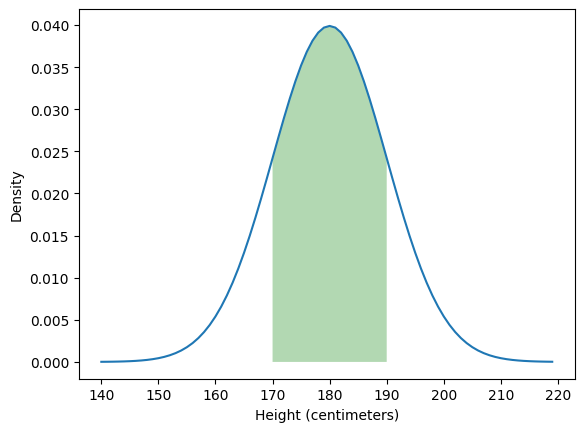

In [24]:
# Plot between 140 and 220 centimeters by 1 cm steps
x = np.arange(140, 220, 1)
p = norm.pdf(x, 180, 10)
plt.plot(x, p)
plt.fill_between(x,p, where = (x>=170) & (x<=190), facecolor='green', alpha=.3)
plt.xlabel('Height (centimeters)')
plt.ylabel('Density')
plt.show()

Cumulative distribution:

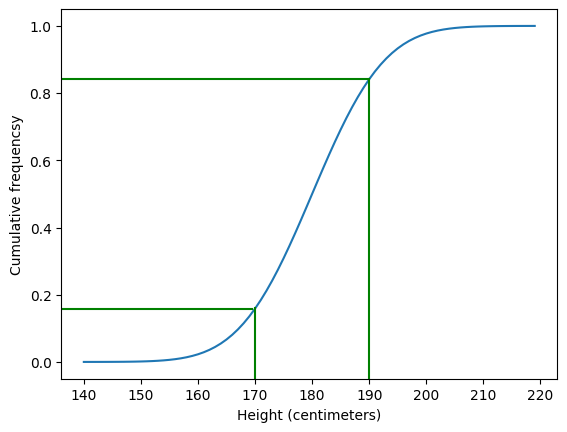

In [25]:
# Plot between 140 and 220 centimeters by 1 cm steps
x = np.arange(140, 220, 1)
p = norm.cdf(x, 180, 10)
plt.plot(x, p)
plt.axhline(y=norm.cdf(170,180,10), xmin=0, xmax=0.385, color='green')
plt.axvline(x=170, ymin=0, ymax=0.19, color='green')
plt.axhline(y=norm.cdf(190,180,10), xmin=0, xmax=0.62, color='green')
plt.axvline(x=190, ymin=0, ymax=0.81, color='green')
plt.xlabel('Height (centimeters)')
plt.ylabel('Cumulative frequencsy')
plt.show()

68.27% of values are within the mean minus/plus one standard deviation
95.45% of values are within the mean minus/plus two standard deviations
99.73% of values are within the mean minus/plus three standard deviations

In [26]:
mean = 180
stddev = 10
for nbr_stddev in range(1,4):
    print('Probability to be within ' + str(nbr_stddev) + ' standard deviation : ' + str((norm.cdf(mean+(nbr_stddev*stddev), loc=mean, scale=stddev) - norm.cdf(mean-(nbr_stddev*stddev), loc=mean, scale=stddev))*100) + ' %')

Probability to be within 1 standard deviation : 68.26894921370858 %
Probability to be within 2 standard deviation : 95.44997361036415 %
Probability to be within 3 standard deviation : 99.73002039367398 %


Alternative calculation:

In [27]:
print( norm.cdf(1, loc=0, scale=1) - norm.cdf(-1, loc=0, scale=1) )
print( norm.cdf(2, loc=0, scale=1) - norm.cdf(-2, loc=0, scale=1) )
print( norm.cdf(3, loc=0, scale=1) - norm.cdf(-3, loc=0, scale=1) )


0.6826894921370859
0.9544997361036416
0.9973002039367398


Standardnormal distribution:

In [28]:
mean = 180
stddev = 10

print('Z-score of somebody measuring 190 cm: ' + str((190-mean)/stddev))
print('Z-score of somebody measuring 200 cm: ' + str((200-mean)/stddev))

Z-score of somebody measuring 190 cm: 1.0
Z-score of somebody measuring 200 cm: 2.0


What if you can only use the standard distribution (Z-scores):

In [29]:
mean = 180
strddev = 10
norm.cdf ((200-mean)/stddev, loc=0, scale=1) - norm.cdf((190-mean)/stddev, loc=0, scale=1) 

0.13590512198327787

In [30]:
print( norm.cdf(190, loc=180, scale=10) - norm.cdf(170, loc=180, scale=10) )
print( norm.cdf(1, loc=0, scale=1) - norm.cdf(-1, loc=0, scale=1) )
print( norm.cdf(1) - norm.cdf(-1) )

0.6826894921370859
0.6826894921370859
0.6826894921370859


In [31]:
print( norm.cdf(210, loc=180, scale=10) - norm.cdf(150, loc=180, scale=10) )
print( norm.cdf(3, loc=0, scale=1) - norm.cdf(-3, loc=0, scale=1) )
print( norm.cdf(3) - norm.cdf(-3) )

0.9973002039367398
0.9973002039367398
0.9973002039367398


## 4.3 Relationship between binomial and normal distribution

<Figure size 640x480 with 0 Axes>

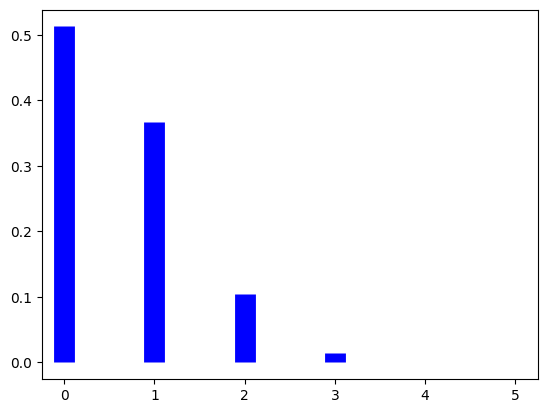

<Figure size 640x480 with 0 Axes>

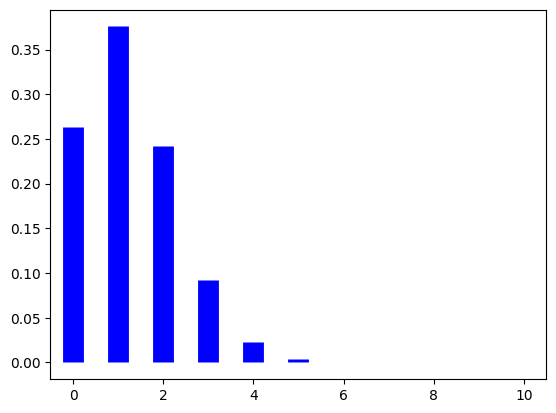

<Figure size 640x480 with 0 Axes>

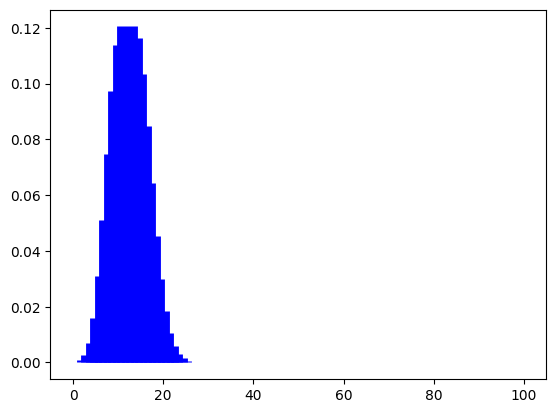

In [32]:
def plotbinom(n, p):
    x = range(0, n + 1)
    plt.figure()
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=0)
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=15)
    plt.show()
    return

plotbinom(5, 1 / 8)
plotbinom(10, 1 / 8)
plotbinom(100, 1 / 8)


## 4.4 Poisson distribution

Probability of occurences with 1 expected occurence per time interval:

In [33]:
k=range(0,13)
poisson.pmf(k, 1) # Probability mass function with λ = 1

array([3.67879441e-01, 3.67879441e-01, 1.83939721e-01, 6.13132402e-02,
       1.53283100e-02, 3.06566201e-03, 5.10943668e-04, 7.29919526e-05,
       9.12399408e-06, 1.01377712e-06, 1.01377712e-07, 9.21615563e-09,
       7.68012969e-10])

<Figure size 640x480 with 0 Axes>

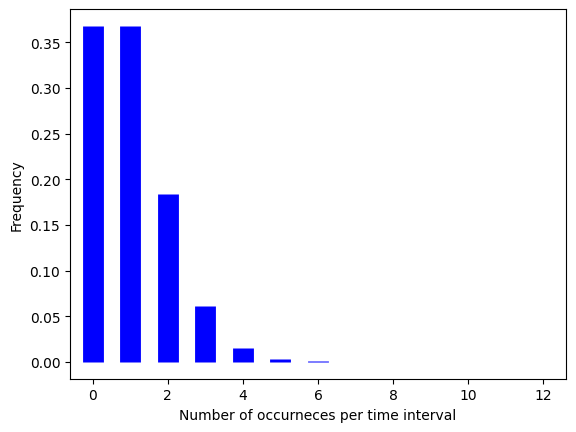

In [34]:
x = range(0, 13)
plt.figure()
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x, 1), 'bo', ms=0)
ax.vlines(x, 0, poisson.pmf(x, 1), colors='b', lw=15)
plt.xlabel('Number of occurneces per time interval')
plt.ylabel('Frequency')
plt.show()

Probability of occurences with 3 expected occurence per time interval:

In [35]:
k=range(0,13)
poisson.pmf(k, 3) # Probability mass function with λ = 1

array([4.97870684e-02, 1.49361205e-01, 2.24041808e-01, 2.24041808e-01,
       1.68031356e-01, 1.00818813e-01, 5.04094067e-02, 2.16040315e-02,
       8.10151179e-03, 2.70050393e-03, 8.10151179e-04, 2.20950322e-04,
       5.52375804e-05])

<Figure size 640x480 with 0 Axes>

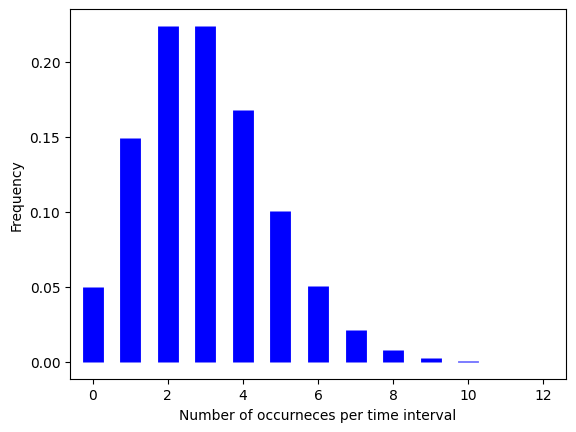

In [36]:
x = range(0, 13)
plt.figure()
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x, 3), 'bo', ms=0)
ax.vlines(x, 0, poisson.pmf(x, 3), colors='b', lw=15)
plt.xlabel('Number of occurneces per time interval')
plt.ylabel('Frequency')
plt.show()

Probability to have up to 2 occurences given 3 expected occurences per time interval:

In [37]:
poisson.cdf(2, 3)

0.42319008112684364

Alternative:

In [38]:
poisson.pmf(0, 3) + poisson.pmf(1, 3)  + poisson.pmf(2, 3)

0.42319008112684353

Probability that 25 fires will occur in a municipality of 9000 buildings:

In [39]:
lambda_sample = 10000/4500000*9000
print('lambda : ' + str(lambda_sample))
poisson.pmf(25, lambda_sample)

lambda : 20.0


0.04458764910826764

In [40]:
Probability that at least 25 fires will occur in a municipality of 9000 buildings:

SyntaxError: invalid syntax (4236056449.py, line 1)

In [41]:
1-poisson.cdf(24, 20)

0.15677262182623775